<h1>Netflix Content and Viewership Analysis</h1>
1. Introduction
This notebook analyzes Netflix's content production trends, viewership patterns, and demographic influences across different time periods and regions. We'll explore the balance between movies and TV shows, genre popularity, and viewership demographics.
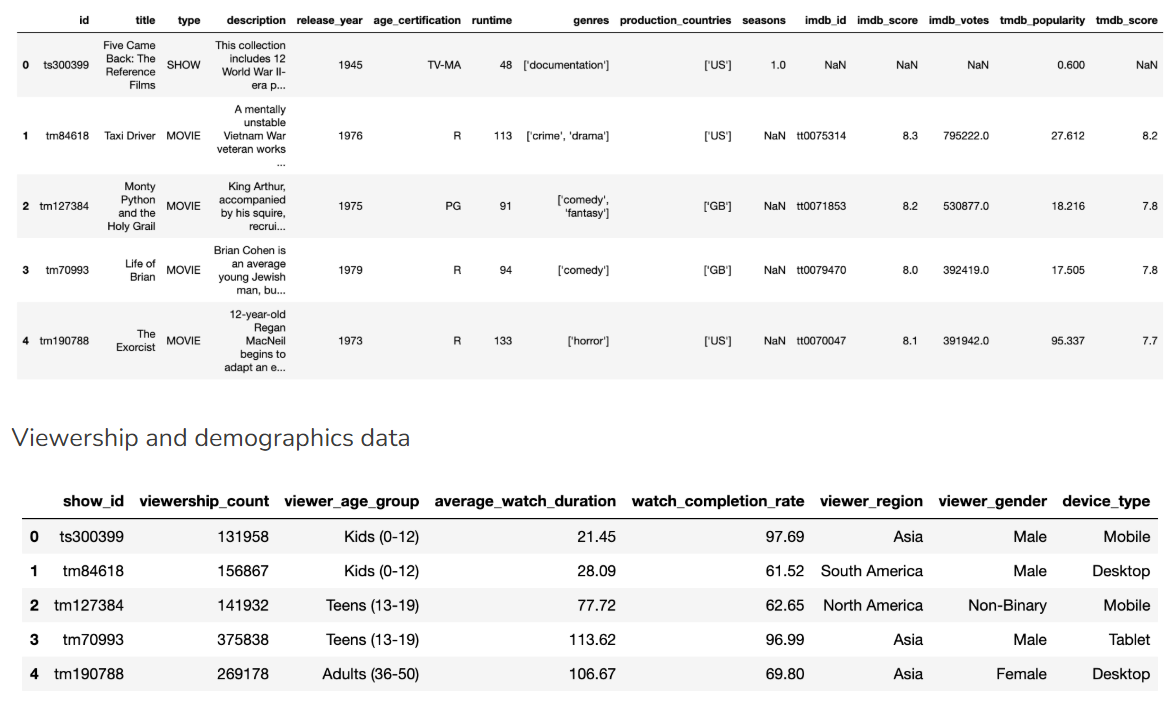

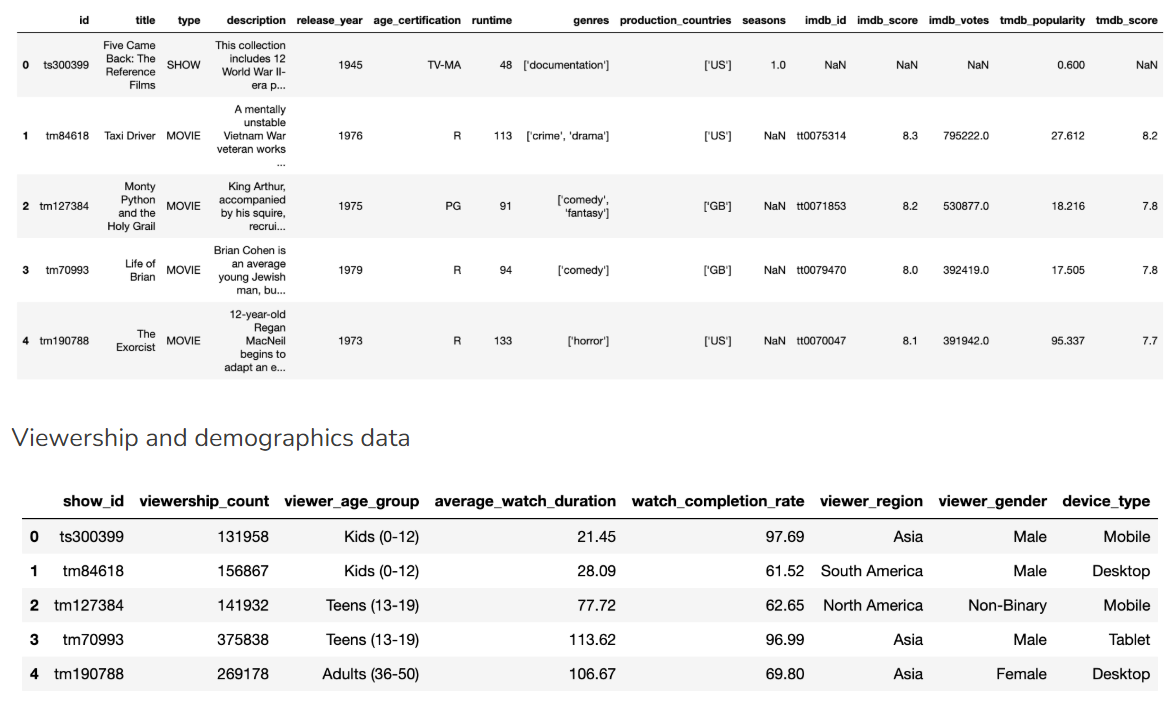

<h2>2. Data Loading and Preprocessing</h2>
We'll load two datasets: Netflix content data and viewership data. These datasets will be merged to provide a comprehensive view of content and its associated viewership statistics.


In [1]:
# !pip install plotly pandas
import plotly 
import pandas

print("\nWe've installed the necessary libraries.")


We've installed the necessary libraries.


pio.renderers.default = 'iframe' is used in Plotly
'iframe': Indicates that Plotly visualizations should be rendered as an HTML iframe element. The plot is embedded in an isolated HTML document, allowing the plot to display in environments that support iframes.


In [2]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import time

# Set default renderer for Plotly
pio.renderers.default = 'iframe'

print("\nWe have now imported those libraries so we can:\n",
      "- Use pandas for data manipulation\n",
      "- Create interactive plots with plotly and statistical data visualization\n")


We have now imported those libraries so we can:
 - Use pandas for data manipulation
 - Create interactive plots with plotly and statistical data visualization



In [3]:
def load_dataset(url):
    try:
        return pd.read_csv(url)
    except Exception as e:
        print(f'Error loading dataset: {e}')
        return None

netflix_df = load_dataset('https://gitlab.crio.do/public_content/da_ds_artifacts/-/raw/master/netflix-dataset.csv')
viewership_df = load_dataset('https://gitlab.crio.do/public_content/da_ds_artifacts/-/raw/master/Viewership_Data_with_Demographics.csv')

print("\nWe've defined a function to load datasets from URLs and used it to load our Netflix content and viewership datasets.\n")


We've defined a function to load datasets from URLs and used it to load our Netflix content and viewership datasets.



In [7]:
if netflix_df is not None and viewership_df is not None:
    for df in [netflix_df, viewership_df]:
        if 'id' in df.columns:
            df.rename(columns={'id': 'show_id'}, inplace=True)
    
    data = pd.merge(netflix_df, viewership_df, on='show_id', how='inner')
    display(data.head())
    print("We've successfully merged the Netflix content and viewership datasets on the 'show_id' column. This combined dataset will be used for our analysis.")
else:
    print("Failed to load or merge datasets")

,show_id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,imdb_votes,tmdb_popularity,tmdb_score,viewership_count,viewer_age_group,average_watch_duration,watch_completion_rate,viewer_region,viewer_gender,device_type
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,...,NaN,0.600,NaN,131958,Kids (0-12),21.45,97.69,Asia,Male,Mobile
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,...,795222.0,27.612,8.2,156867,Kids (0-12),28.09,61.52,South America,Male,Desktop
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,...,530877.0,18.216,7.8,141932,Teens (13-19),77.72,62.65,North America,Non-Binary,Mobile
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,...,392419.0,17.505,7.8,375838,Teens (13-19),113.62,96.99,Asia,Male,Tablet
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,...,391942.0,95.337,7.7,269178,Adults (36-50),106.67,69.80,Asia,Female,Desktop


We've successfully merged the Netflix content and viewership datasets on the 'show_id' column. This combined dataset will be used for our analysis.


<h2>3. Movies vs Shows Analysis</h2>
3.1 Movies/Shows Count Over the Years
We'll visualize how the production of Movies and TV Shows has evolved over time, grouped into 5-year intervals for better trend visibility.

data.groupby(['year_interval', 'type']):

Groups the data by the combination of the year_interval column (e.g., 2000, 2005, etc.) and the type column (e.g., "Movie" or "Show").
This creates groups for each unique pair of year_interval and type

.size():

Counts the number of rows in each group. This gives the total number of entries (e.g., movies or shows) for each year_interval and type.

.unstack(fill_value=0):

Reshapes the grouped data from a multi-level index into a tabular format (like a pivot table).
The unique values from the type column become the columns of the new DataFrame, and the counts for each type are the corresponding values.
fill_value=0 ensures that missing values (where no data exists for a particular type in an interval) are filled with 0.


In [14]:
def plot_movies_vs_shows(data):
    data['year_interval'] = (data['release_year'] // 5) * 5
    movies_vs_shows_interval = data.groupby(['year_interval', 'type']).size().unstack(fill_value=0)
    movies_vs_shows_long = movies_vs_shows_interval.reset_index().melt(id_vars='year_interval', 
                                                                       var_name='Type', 
                                                                       value_name='Count')
    
    fig = px.bar(movies_vs_shows_long, 
                 x='year_interval', 
                 y='Count', 
                 color='Type', 
                 title='Movies vs TV Shows Over 5-Year Intervals',
                 labels={'year_interval': '5-Year Intervals', 'Count': 'Number of Titles Produced'},
                 text='Count',
                 height=600)
    
    fig.update_layout(barmode='stack', xaxis_title='5-Year Intervals', yaxis_title='Number of Titles', 
                      legend_title='Type')
    fig.show()
    
print("\nWe've defined a function to create a stacked bar chart showing the count of Movies vs TV Shows over 5-year intervals.\n")


We've defined a function to create a stacked bar chart showing the count of Movies vs TV Shows over 5-year intervals.



In [16]:
plot_movies_vs_shows(data)

print("This chart visualizes the trend in Netflix's content production, showing how the balance between Movies and TV Shows has changed over time.")

This chart visualizes the trend in Netflix's content production, showing how the balance between Movies and TV Shows has changed over time.


### 3.2 Insight
The stacked bar chart above illustrates Netflix's content production focus over time, showing whether they've been emphasizing Movies or TV Shows in different periods. This can help us understand Netflix's content strategy evolution.

## 4. Show Popularity Analysis

### 4.1 What Kind of Shows are Becoming Popular
We'll analyze which genres of TV Shows are growing in popularity across the years, helping to identify trending content categories.

In [5]:
def plot_genre_popularity(data):
    if 'genres' not in data.columns:
        print("No 'genres' column found. Please check the dataset.")
        return
    
    tv_shows = data[data['type'] == 'SHOW'].copy()
    tv_shows['genres'] = tv_shows['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)
    tv_shows_exploded = tv_shows.explode('genres')
    tv_shows_exploded['year_interval'] = (tv_shows_exploded['release_year'] // 5) * 5
    
    genres_popularity = tv_shows_exploded.groupby(['year_interval', 'genres']).size().unstack(fill_value=0)
    genres_popularity_long = genres_popularity.reset_index().melt(id_vars='year_interval', var_name='Genre', value_name='Count')
    
    fig = px.bar(genres_popularity_long, 
                 x='year_interval', 
                 y='Count', 
                 color='Genre', 
                 title='Popularity of TV Show Genres Over 5-Year Intervals',
                 labels={'year_interval': '5-Year Intervals', 'Count': 'Number of Shows'},
                 text='Count',
                 height=600)
    
    fig.update_layout(barmode='stack', xaxis_title='5-Year Intervals', yaxis_title='Number of Shows', 
                      legend_title='Genres', 
                      legend=dict(x=1, y=1, bgcolor='rgba(255,255,255,0.5)', bordercolor='rgba(0,0,0,0.1)'))
    fig.show()
    
print("\nWe've defined a function to create a stacked bar chart showing the popularity of different TV show genres over 5-year intervals.\n")


We've defined a function to create a stacked bar chart showing the popularity of different TV show genres over 5-year intervals.



In [6]:
plot_genre_popularity(data)

print("This chart visualizes the changing popularity of different TV show genres over time, helping identify trends in content preferences.")

NameError: name 'data' is not defined

### 4.2 Insight
The stacked bar chart reveals which genres of TV shows are becoming more popular, which remain constant, and which are declining over time. This information can guide content creation strategies and help predict future trends.

## 5. Genre Distribution Analysis

### 5.1 Genre Distribution by Region
We'll explore how genre preferences vary across different regions, providing insights into regional content preferences.

In [1]:
def plot_genre_distribution_by_region(data):
    if 'genres' not in data.columns or 'viewer_region' not in data.columns:
        print("The 'genres' or 'viewer_region' column is not found in the dataset.")
        return
    
    # Ensure genres column is properly formatted as lists
    data['genres'] = data['genres'].apply(lambda x: eval(x) if isinstance(x, str) else x)
    data_exploded = data.explode('genres')
    
    # Group by region and genre
    genre_region_distribution = data_exploded.groupby(['viewer_region', 'genres']).size().unstack(fill_value=0)
    
    for region in genre_region_distribution.index:
        genre_counts = genre_region_distribution.loc[region].reset_index()
        genre_counts.columns = ['Genre', 'Count']
        
        # Check if there are genres to plot
        if genre_counts['Count'].sum() == 0:
            print(f"No genre data available for {region}. Skipping plot.")
            continue
        
        # Create pie chart
        fig = px.pie(genre_counts, 
                     values='Count', 
                     names='Genre', 
                     title=f'Genre Distribution in {region}', 
                     hover_data=['Count'], 
                     labels={'Count':'Number of Titles'})
        
        fig.show()
        time.sleep(1)  # add delay to ensure rendering
        
print("\nWe've defined a function to create pie charts showing the distribution of genres for each region in our dataset.\n")


We've defined a function to create pie charts showing the distribution of genres for each region in our dataset.



In [2]:
plot_genre_distribution_by_region(data)

print("These pie charts visualize the genre distribution for each region, allowing us to compare content preferences across different geographical areas.")

NameError: name 'data' is not defined

5.2 Insight
These pie charts illustrate the genre distribution across different regions, highlighting potential regional preferences in content consumption. This information can be valuable for targeted content creation and marketing strategies, allowing Netflix to tailor its offerings to specific regional tastes.

## 6. Viewership Analysis

### 6.1 Viewership Based on Demographics
We'll visualize viewership patterns based on age groups and regions to understand how different demographic segments consume Netflix content.

In [ ]:
def plot_viewership_by_age_and_region(data):
    age_region_viewership = data.groupby(['viewer_age_group', 'viewer_region'])['viewership_count'].sum().unstack()
    age_region_viewership_long = age_region_viewership.reset_index().melt(id_vars='viewer_age_group', 
                                                                          var_name='Region', 
                                                                          value_name='Viewership')
    
    fig = px.bar(age_region_viewership_long, 
                 x='viewer_age_group', 
                 y='Viewership', 
                 color='Region', 
                 title='Stacked Viewership by Age Group and Region',
                 labels={'viewer_age_group': 'Age Group', 'Viewership': 'Total Viewership Count'},
                 hover_data={'Viewership': ':.0f'})
    fig.show()
    
print("\nWe've defined a function to create a stacked bar chart showing viewership patterns across different age groups and regions.\n")

In [ ]:
plot_viewership_by_age_and_region(data)

print("This stacked bar chart visualizes the viewership distribution across different age groups and regions, allowing us to identify demographic trends in content consumption.")

### 6.2 Insight
This stacked bar chart provides insights into the content preferences of different age groups across various regions. It can help in tailoring content and marketing strategies for specific demographic segments, potentially leading to more targeted content recommendations and acquisition strategies.

## 7. Conclusion
Based on the analysis conducted, we can draw several conclusions:

1. Content Production Trends: We've observed how Netflix's focus on Movies vs TV Shows has evolved over time, which reflects their content strategy shifts.
2. Genre Popularity: We've identified which genres are gaining popularity, remaining stable, or declining, providing insights for future content creation.
3. Regional Preferences: We've uncovered how genre preferences vary across different regions, which can inform region-specific content strategies.
4. Demographic Insights: We've gained understanding of viewership patterns across age groups and regions, allowing for more targeted content and marketing approaches.

These insights can be used to optimize content creation strategies, inform marketing efforts, and enhance the overall viewer experience on the Netflix platform. By leveraging this data, Netflix can make more informed decisions about what types of content to produce or acquire, how to market different shows or movies to specific demographics, and how to tailor their content library for different regions.